In [1]:
import numpy as np

def posterior_prob_N0(M, p):
    Ns = np.arange(M+1)
    prior = np.ones(M+1)/(M+1)
    likelihood = (1-p)**Ns           # P(Y=0 | N)
    unnorm_post = prior * likelihood
    post = unnorm_post / unnorm_post.sum()
    return post[0]

# (a) M=19, p=0.2
print("a)", posterior_prob_N0(M=19, p=0.2))

# (b) M=99, p=0.2
print("b)", posterior_prob_N0(M=99, p=0.2))

# (c) M=19, p=0.9
print("c)", posterior_prob_N0(M=19, p=0.9))


a) 0.20233273764314755
b) 0.20000000004074064
c) 0.9


In [3]:
np.arange(12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

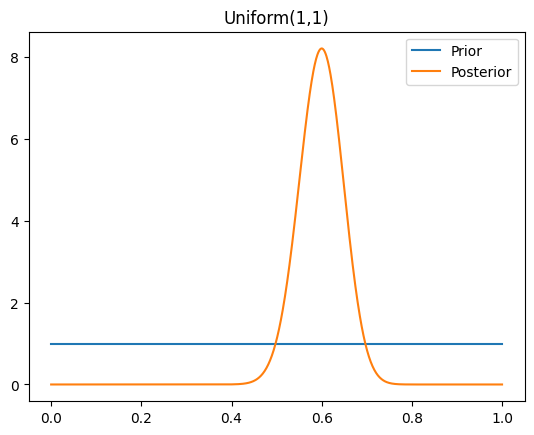

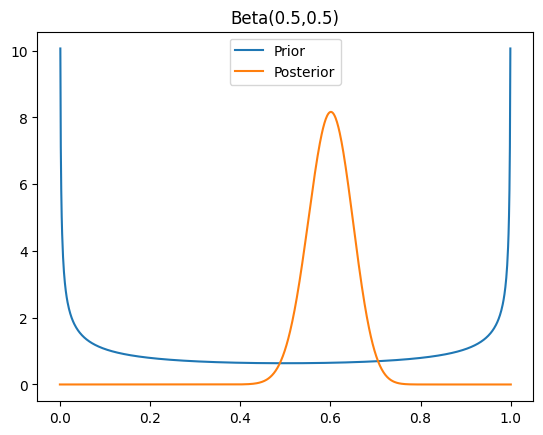

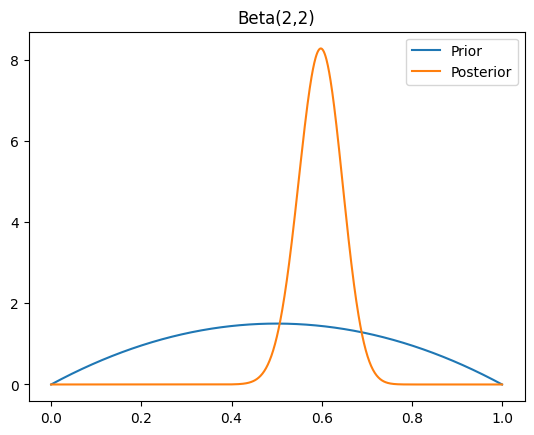

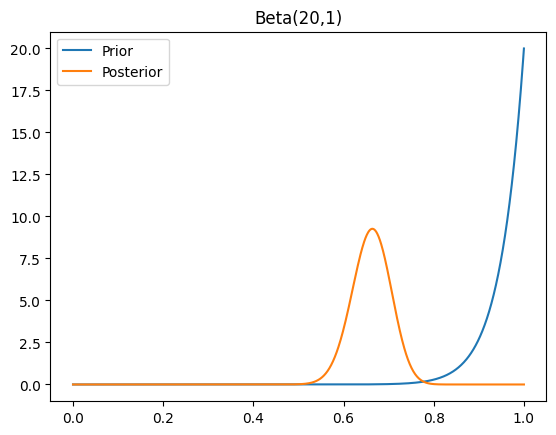

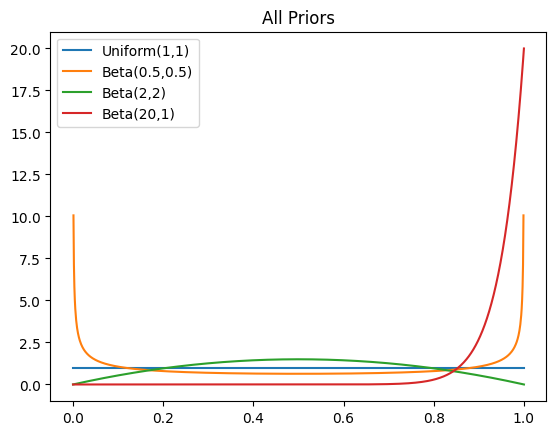

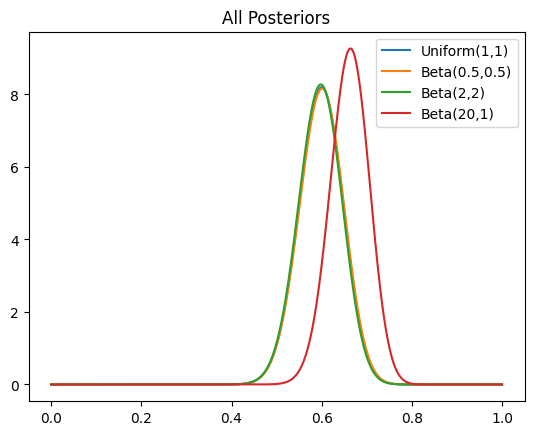


--- Prior / Posterior summaries ---

Uniform(1,1)
Prior mean, SD: 0.5 0.28867513459481287
Posterior mean, SD: 0.5980392156862745 0.048310113937121604
95% posterior CI: [0.50174408 0.69069148]

Beta(0.5,0.5)
Prior mean, SD: 0.5 0.3535533905932738
Posterior mean, SD: 0.599009900990099 0.04852703304687661
95% posterior CI: [0.50225674 0.6920477 ]

Beta(2,2)
Prior mean, SD: 0.5 0.22360679774997896
Posterior mean, SD: 0.5961538461538461 0.047884229223033585
95% posterior CI: [0.50075632 0.68804727]

Beta(20,1)
Prior mean, SD: 0.9523809523809523 0.0454029804402663
Posterior mean, SD: 0.6611570247933884 0.04285205327824829
95% posterior CI: [0.57482171 0.74244565]

--- Hypothesis Probabilities ---

Uniform(1,1)
P(H0: theta>=0.5) = 0.9769779665353286
P(H1: theta<0.5)  = 0.023022033464671347

Beta(0.5,0.5)
P(H0: theta>=0.5) = 0.9775215216279282
P(H1: theta<0.5)  = 0.022478478372071807

Beta(2,2)
P(H0: theta>=0.5) = 0.9758831739145015
P(H1: theta<0.5)  = 0.02411682608549844

Beta(20,1)
P(H0: th

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import beta

n = 100
Y = 60

priors = {
    "Uniform(1,1)": (1,1),
    "Beta(0.5,0.5)": (0.5,0.5),
    "Beta(2,2)": (2,2),
    "Beta(20,1)": (20,1)
}

theta = np.linspace(0,1,1000)

posteriors = {}

# ---- (a) + (b): prior & posterior plots ----
for name,(a,b) in priors.items():
    ap = a + Y
    bp = b + n - Y
    posteriors[name] = (ap,bp)

    plt.figure()
    plt.plot(theta, beta.pdf(theta,a,b), label="Prior")
    plt.plot(theta, beta.pdf(theta,ap,bp), label="Posterior")
    plt.title(name)
    plt.legend()
    plt.show()

# ---- (c): all priors together ----
plt.figure()
for name,(a,b) in priors.items():
    plt.plot(theta, beta.pdf(theta,a,b), label=name)
plt.title("All Priors")
plt.legend()
plt.show()

# all posteriors together
plt.figure()
for name,(ap,bp) in posteriors.items():
    plt.plot(theta, beta.pdf(theta,ap,bp), label=name)
plt.title("All Posteriors")
plt.legend()
plt.show()

# ---- (d): mean, SD, 95% CI ----
print("\n--- Prior / Posterior summaries ---")
for name,(a,b) in priors.items():
    ap,bp = posteriors[name]

    prior_mean = a/(a+b)
    prior_sd = np.sqrt(a*b/((a+b)**2*(a+b+1)))

    post_mean = ap/(ap+bp)
    post_sd = np.sqrt(ap*bp/((ap+bp)**2*(ap+bp+1)))

    ci = beta.ppf([0.025,0.975], ap, bp)

    print(f"\n{name}")
    print("Prior mean, SD:", prior_mean, prior_sd)
    print("Posterior mean, SD:", post_mean, post_sd)
    print("95% posterior CI:", ci)

# ---- (e): hypothesis test P(theta>=0.5) ----
print("\n--- Hypothesis Probabilities ---")
for name,(ap,bp) in posteriors.items():
    p_null = 1 - beta.cdf(0.5, ap, bp)   # P(theta>=0.5)
    p_alt = beta.cdf(0.5, ap, bp)       # P(theta<0.5)

    print(f"\n{name}")
    print("P(H0: theta>=0.5) =", p_null)
    print("P(H1: theta<0.5)  =", p_alt)
